# Data Analysis & Machine Learning Part

The purpose of this python script is to carry out an exploratory analysis on the data chosen for subsequent machine learning part.

It was decided to divide the dataset in two, according to the value of the BEP and to keep only those columns which at the time of contracting can be known in order to optimise the future choice of investments, maximising positive returns.
The choice of labels was made taking into account only those characteristics that can already be known, plus the situation of the first month,  as all clients maintain the contract for at least one month.

A Python script, named 'Classification.ipynb' was created to assess binary classification algorithms on the BEP using the same columns as in the variable query.

This strengthens our decision to conduct regressions on the split datasets according to the BEP value.


In [1]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Connection String

serverName = "sqlserver-pw.database.windows.net" 
databaseName = "db-ai"
username = "girls"
password = "Password?"

In [39]:
# Make the conncection to our Server

connection_string = f'DRIVER={{SQL Server}};SERVER='+serverName+';DATABASE='+databaseName+';UID='+username+';PWD='+ password

cnxn = pyodbc.connect(connection_string)
cursor = cnxn.cursor()

In [4]:
#Splitting the Dataset based on the value of BEP 

query_0 = "SELECT  Canale, CodAgenzia,ClusterAgenzia, CodContratto,CategoriaCespite, Cespite, TipologiaUtenza,[DataTrasf.entr.], Anagrafica,SettoreMerceologico, ListinoProposto, [Soc.Vend.Prec.],ClusterSocVend,Localita, [Cod.ISTAT], Provincia,RegioneItaliana, Zona, ModoPagamento, RedditoTotale, Mese01,MesiBEP,MesiAttivi, UltimoReddito FROM try.DatiConsumi_ML WHERE BEP = 0"
query_1 = "SELECT  Canale, CodAgenzia,ClusterAgenzia, CodContratto,CategoriaCespite, Cespite, TipologiaUtenza,[DataTrasf.entr.], Anagrafica,SettoreMerceologico, ListinoProposto, [Soc.Vend.Prec.],ClusterSocVend,Localita, [Cod.ISTAT], Provincia,RegioneItaliana, Zona, ModoPagamento, RedditoTotale, Mese01,MesiBEP,MesiAttivi, UltimoReddito FROM try.DatiConsumi_ML WHERE BEP = 1"
query = "SELECT  Canale, CodAgenzia,ClusterAgenzia, CodContratto,CategoriaCespite, Cespite, TipologiaUtenza,[DataTrasf.entr.], Anagrafica,SettoreMerceologico, ListinoProposto, [Soc.Vend.Prec.],ClusterSocVend,Localita, [Cod.ISTAT], Provincia,RegioneItaliana, Zona, ModoPagamento, RedditoTotale, Mese01,MesiBEP,MesiAttivi, UltimoReddito,BEP FROM try.DatiConsumi_ML "

## Exploratory Data Analysis


In [5]:
df = pd.read_sql(query,cnxn)

C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\620203339.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,cnxn)


In [6]:
correlation_matrix = df.corr()

C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


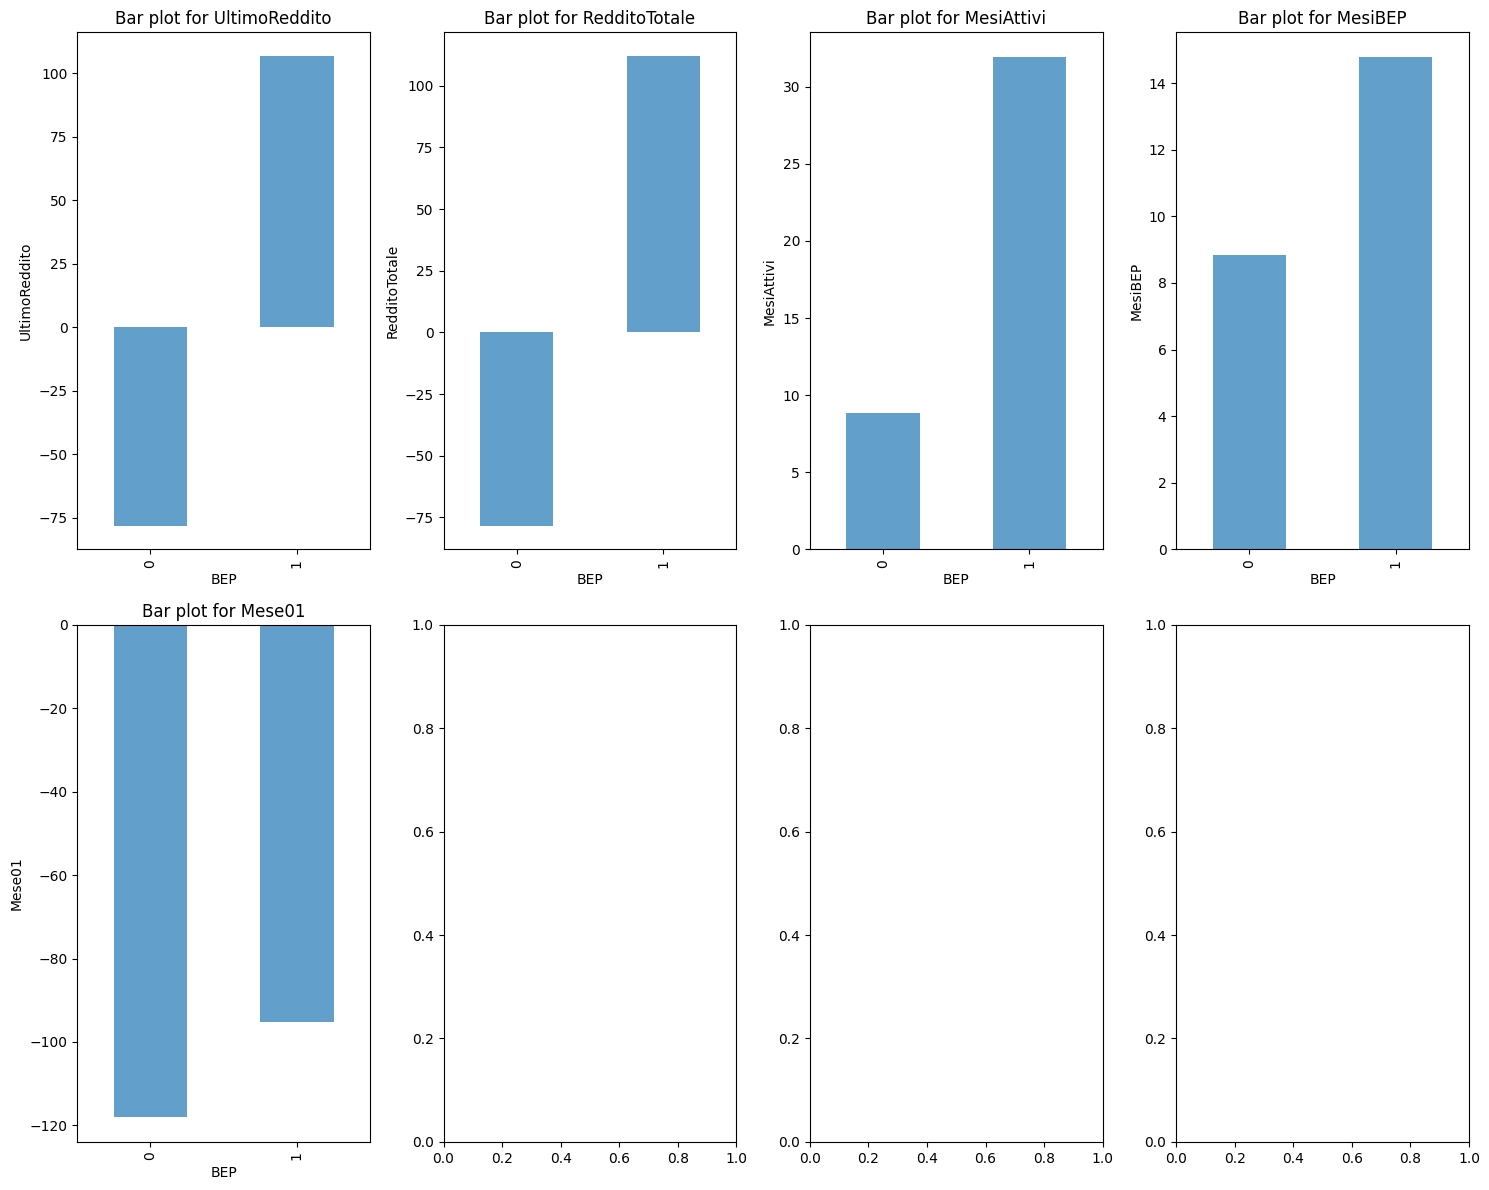

In [7]:
target_variable = 'BEP'

# Sort features based on their correlation with the binary target variable
sorted_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).index

# Select the top features (excluding the target variable itself)
top_features = sorted_features[1:21]  # Adjust the number based on your preference

# Create subplots
num_rows = 2
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Adjusted figure size

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Iterate through the top features
for ax, feature in zip(axs, top_features):
    # Use bar plots for binary target variable
    df.groupby(target_variable)[feature].mean().plot(kind='bar', ax=ax, alpha=0.7)
    ax.set_xlabel(target_variable)
    ax.set_ylabel(feature)
    ax.set_title(f'Bar plot for {feature}')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [8]:
#Load the dataset into a pandas DataFrame

df_1 = pd.read_sql(query_1, cnxn)

df_0 = pd.read_sql(query_0, cnxn)


C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\1037909565.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql(query_1, cnxn)
C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\1037909565.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_0 = pd.read_sql(query_0, cnxn)


In [9]:
# Displaying information about the dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134966 entries, 0 to 134965
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Canale               134966 non-null  object 
 1   CodAgenzia           134966 non-null  object 
 2   ClusterAgenzia       134966 non-null  object 
 3   CodContratto         134966 non-null  object 
 4   CategoriaCespite     134966 non-null  object 
 5   Cespite              134966 non-null  object 
 6   TipologiaUtenza      134966 non-null  object 
 7   DataTrasf.entr.      134966 non-null  object 
 8   Anagrafica           134966 non-null  object 
 9   SettoreMerceologico  134966 non-null  object 
 10  ListinoProposto      134966 non-null  object 
 11  Soc.Vend.Prec.       134868 non-null  object 
 12  ClusterSocVend       134966 non-null  object 
 13  Localita             134966 non-null  object 
 14  Cod.ISTAT            134966 non-null  object 
 15  Provincia        

In [10]:
# Displaying information about the dataframe

df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339991 entries, 0 to 339990
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Canale               339991 non-null  object 
 1   CodAgenzia           339991 non-null  object 
 2   ClusterAgenzia       339991 non-null  object 
 3   CodContratto         339991 non-null  object 
 4   CategoriaCespite     339991 non-null  object 
 5   Cespite              339991 non-null  object 
 6   TipologiaUtenza      339991 non-null  object 
 7   DataTrasf.entr.      339991 non-null  object 
 8   Anagrafica           339991 non-null  object 
 9   SettoreMerceologico  339991 non-null  object 
 10  ListinoProposto      339991 non-null  object 
 11  Soc.Vend.Prec.       339857 non-null  object 
 12  ClusterSocVend       339991 non-null  object 
 13  Localita             339991 non-null  object 
 14  Cod.ISTAT            339991 non-null  object 
 15  Provincia        

In [11]:
# Checking for missing values in the dataframe

df_1.isnull().sum()

Canale                  0
CodAgenzia              0
ClusterAgenzia          0
CodContratto            0
CategoriaCespite        0
Cespite                 0
TipologiaUtenza         0
DataTrasf.entr.         0
Anagrafica              0
SettoreMerceologico     0
ListinoProposto         0
Soc.Vend.Prec.         98
ClusterSocVend          0
Localita                0
Cod.ISTAT               0
Provincia               0
RegioneItaliana         0
Zona                    0
ModoPagamento           0
RedditoTotale           0
Mese01                  0
MesiBEP                 0
MesiAttivi              0
UltimoReddito           0
dtype: int64

In [12]:
# Checking for missing values in the dataframe

df_0.isnull().sum()

Canale                   0
CodAgenzia               0
ClusterAgenzia           0
CodContratto             0
CategoriaCespite         0
Cespite                  0
TipologiaUtenza          0
DataTrasf.entr.          0
Anagrafica               0
SettoreMerceologico      0
ListinoProposto          0
Soc.Vend.Prec.         134
ClusterSocVend           0
Localita                 0
Cod.ISTAT                0
Provincia                0
RegioneItaliana          0
Zona                     0
ModoPagamento            0
RedditoTotale            0
Mese01                   0
MesiBEP                  0
MesiAttivi               0
UltimoReddito            0
dtype: int64

In [13]:
# Dropping rows with missing values in the Soc.Vend.Prec. column

df_1.dropna(subset=["Soc.Vend.Prec."], inplace=True)
df_0.dropna(subset=["Soc.Vend.Prec."], inplace=True)

In [14]:
df_1['Year_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.year
df_1['Month_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.month
df_1['Day_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.day
df_1.drop(['DataTrasf.entr.'],axis=1,inplace=True) 

df_0['Year_Trasf.entr.'] = pd.to_datetime(df_0['DataTrasf.entr.']).dt.year
df_0['Month_Trasf.entr.'] = pd.to_datetime(df_0['DataTrasf.entr.']).dt.month
df_0['Day_Trasf.entr.'] = pd.to_datetime(df_0['DataTrasf.entr.']).dt.day
df_0.drop(['DataTrasf.entr.'],axis=1,inplace=True) 

In [15]:
 # Converting columns from object to integer type

int_columns = ["Canale", "CodAgenzia", "ClusterAgenzia", "CodContratto", "Cespite",  "Anagrafica", "SettoreMerceologico", "ListinoProposto", "Soc.Vend.Prec.", "ClusterSocVend", "Localita", "Provincia", "RegioneItaliana", "Zona", "ModoPagamento", "UltimoReddito"]
df_1[int_columns] = df_1[int_columns].astype(int)

df_0[int_columns] = df_0[int_columns].astype(int)

In [16]:
# Displaying descriptive statistics of the DataFrame

df_1.describe()
 

,Canale,CodAgenzia,ClusterAgenzia,CodContratto,Cespite,Anagrafica,SettoreMerceologico,ListinoProposto,Soc.Vend.Prec.,ClusterSocVend,...,Zona,ModoPagamento,RedditoTotale,Mese01,MesiBEP,MesiAttivi,UltimoReddito,Year_Trasf.entr.,Month_Trasf.entr.,Day_Trasf.entr.
count,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,...,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000
mean,4.452257,1.921115,2.449180,237022.350016,3.571322,57.379104,1.352471,6.234533,263.013665,2.940297,...,2.373017,1.796972,112.176333,-95.134135,14.790929,31.940075,106.422094,2017.229424,6.283655,1.001142
std,1.328615,1.934512,1.619436,134640.726551,0.634107,22.992324,0.477741,2.042601,136.652459,1.370215,...,0.674646,0.956910,113.113342,40.931439,7.005416,15.215921,100.020136,1.745076,3.295324,0.133394
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,-174.200000,0.000000,1.000000,-2.000000,2015.000000,1.000000,1.000000
25%,4.000000,1.000000,1.000000,118200.000000,3.000000,47.000000,1.000000,6.000000,254.000000,3.000000,...,2.000000,1.000000,30.010000,-120.100000,12.000000,20.000000,30.000000,2016.000000,4.000000,1.000000
50%,4.000000,1.000000,2.000000,258610.500000,4.000000,61.000000,1.000000,7.000000,256.000000,3.000000,...,2.000000,1.000000,72.360000,-109.200000,15.000000,27.000000,72.000000,2017.000000,6.000000,1.000000
75%,6.000000,2.000000,4.000000,353040.250000,4.000000,74.000000,2.000000,7.000000,257.000000,3.000000,...,3.000000,3.000000,155.250000,-67.700000,17.000000,42.000000,155.000000,2019.000000,9.000000,1.000000
max,7.000000,9.000000,5.000000,474916.000000,5.000000,99.000000,2.000000,9.000000,751.000000,7.000000,...,3.000000,3.000000,591.100000,2.800000,59.000000,60.000000,499.000000,2020.000000,12.000000,26.000000


In [17]:
# Displaying descriptive statistics of the DataFrame

df_0.describe()
 

,Canale,CodAgenzia,ClusterAgenzia,CodContratto,Cespite,Anagrafica,SettoreMerceologico,ListinoProposto,Soc.Vend.Prec.,ClusterSocVend,...,Zona,ModoPagamento,RedditoTotale,Mese01,MesiBEP,MesiAttivi,UltimoReddito,Year_Trasf.entr.,Month_Trasf.entr.,Day_Trasf.entr.
count,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,...,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.000000,339857.0
mean,4.667089,1.618651,1.527946,237554.890948,3.488923,57.685206,1.358789,6.950041,257.228573,2.959718,...,2.692365,1.564302,-78.425384,-118.045652,8.836475,8.837608,-77.779613,2017.171687,6.736260,1.0
std,1.203962,1.378865,1.136704,138060.420409,0.747456,23.000685,0.479646,1.668541,140.221919,1.385663,...,0.615335,0.882972,37.940486,25.623906,8.246860,8.248442,37.967514,1.811561,3.432671,0.0
min,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,-175.540000,-175.400000,1.000000,1.000000,-175.000000,2015.000000,1.000000,1.0
25%,4.000000,1.000000,1.000000,118998.000000,3.000000,47.000000,1.000000,7.000000,254.000000,3.000000,...,3.000000,1.000000,-106.800000,-126.700000,3.000000,3.000000,-106.000000,2016.000000,4.000000,1.0
50%,4.000000,1.000000,1.000000,229087.000000,4.000000,61.000000,1.000000,7.000000,256.000000,3.000000,...,3.000000,1.000000,-84.370000,-120.100000,6.000000,6.000000,-84.000000,2017.000000,7.000000,1.0
75%,6.000000,2.000000,1.000000,358066.000000,4.000000,75.000000,2.000000,8.000000,293.000000,3.000000,...,3.000000,3.000000,-47.560000,-109.200000,12.000000,12.000000,-47.000000,2019.000000,10.000000,1.0
max,7.000000,9.000000,5.000000,474938.000000,5.000000,99.000000,2.000000,9.000000,752.000000,7.000000,...,3.000000,3.000000,0.000000,-0.100000,55.000000,55.000000,9.000000,2020.000000,12.000000,1.0


C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\1928049779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()


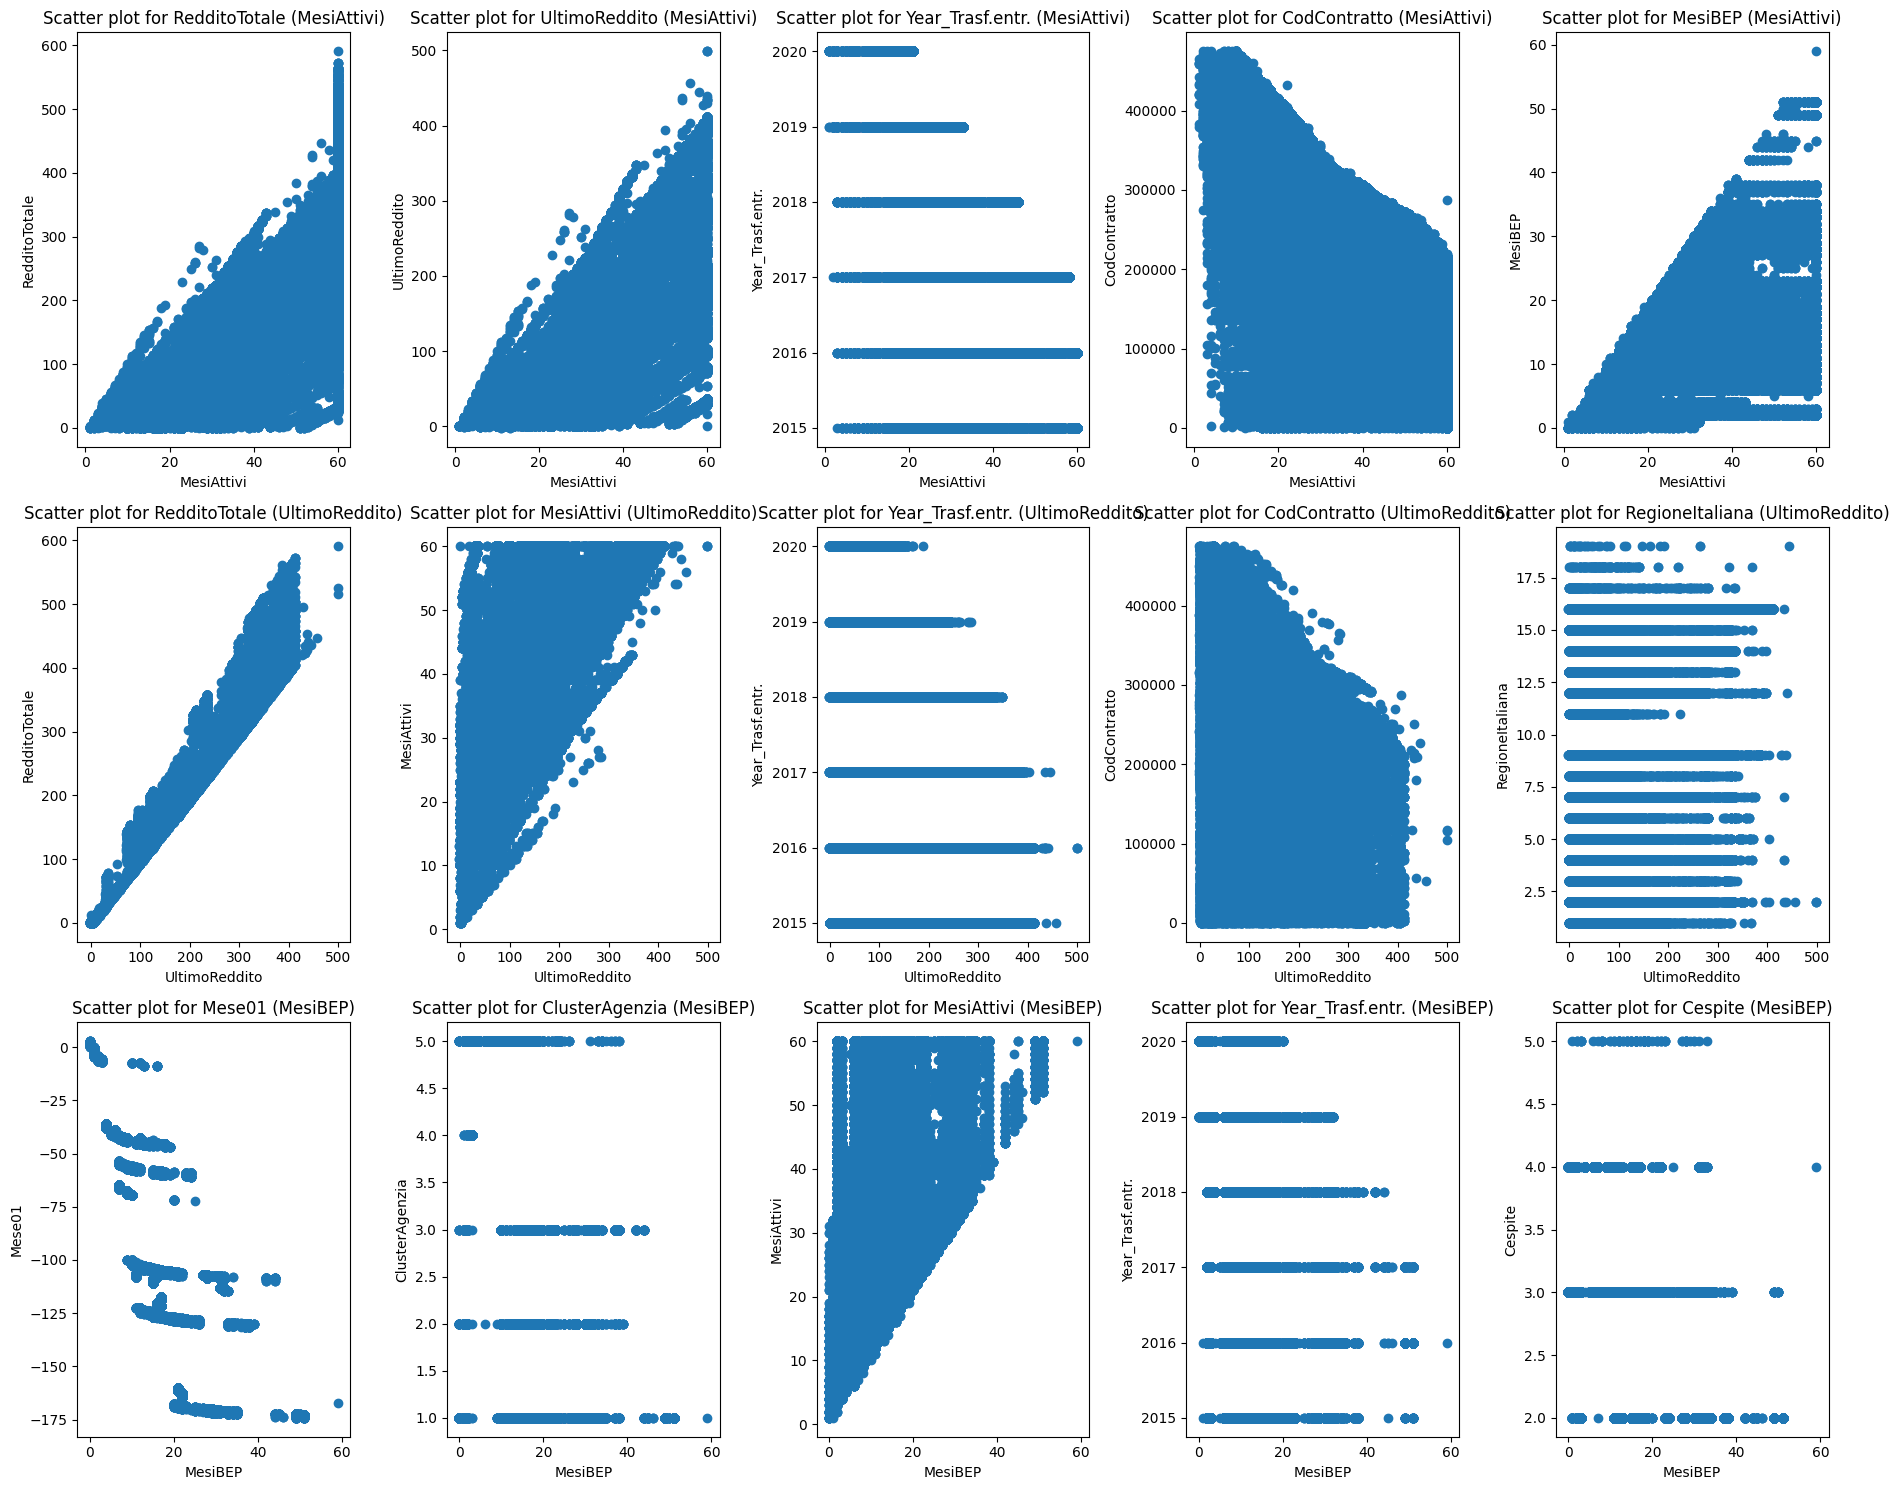

In [18]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_1.corr()

# List of target variables
targets = ['MesiAttivi', 'UltimoReddito', 'MesiBEP']

# Number of top features to consider
num_top_features = 5  # Adjust as needed

# Create subplots
fig, axs = plt.subplots(len(targets), num_top_features, figsize=(18.5, 5 * len(targets)))

# Iterate through target variables
for i, target_variable in enumerate(targets):
    # Sort features based on their correlation with the current target variable
    sorted_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).index
    
    # Select the top features (excluding the target variable itself)
    top_features = sorted_features[1:num_top_features + 1]

    # Iterate through the top features for the current target variable
    for j, feature in enumerate(top_features):
        ax = axs[i, j] if len(targets) > 1 else axs[j]
        ax.scatter(df_1[target_variable], df_1[feature])
        ax.set_xlabel(target_variable)
        ax.set_ylabel(feature)
        ax.set_title(f'Scatter plot for {feature} ({target_variable})')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_41880\2170196595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_0 = df_0.corr()


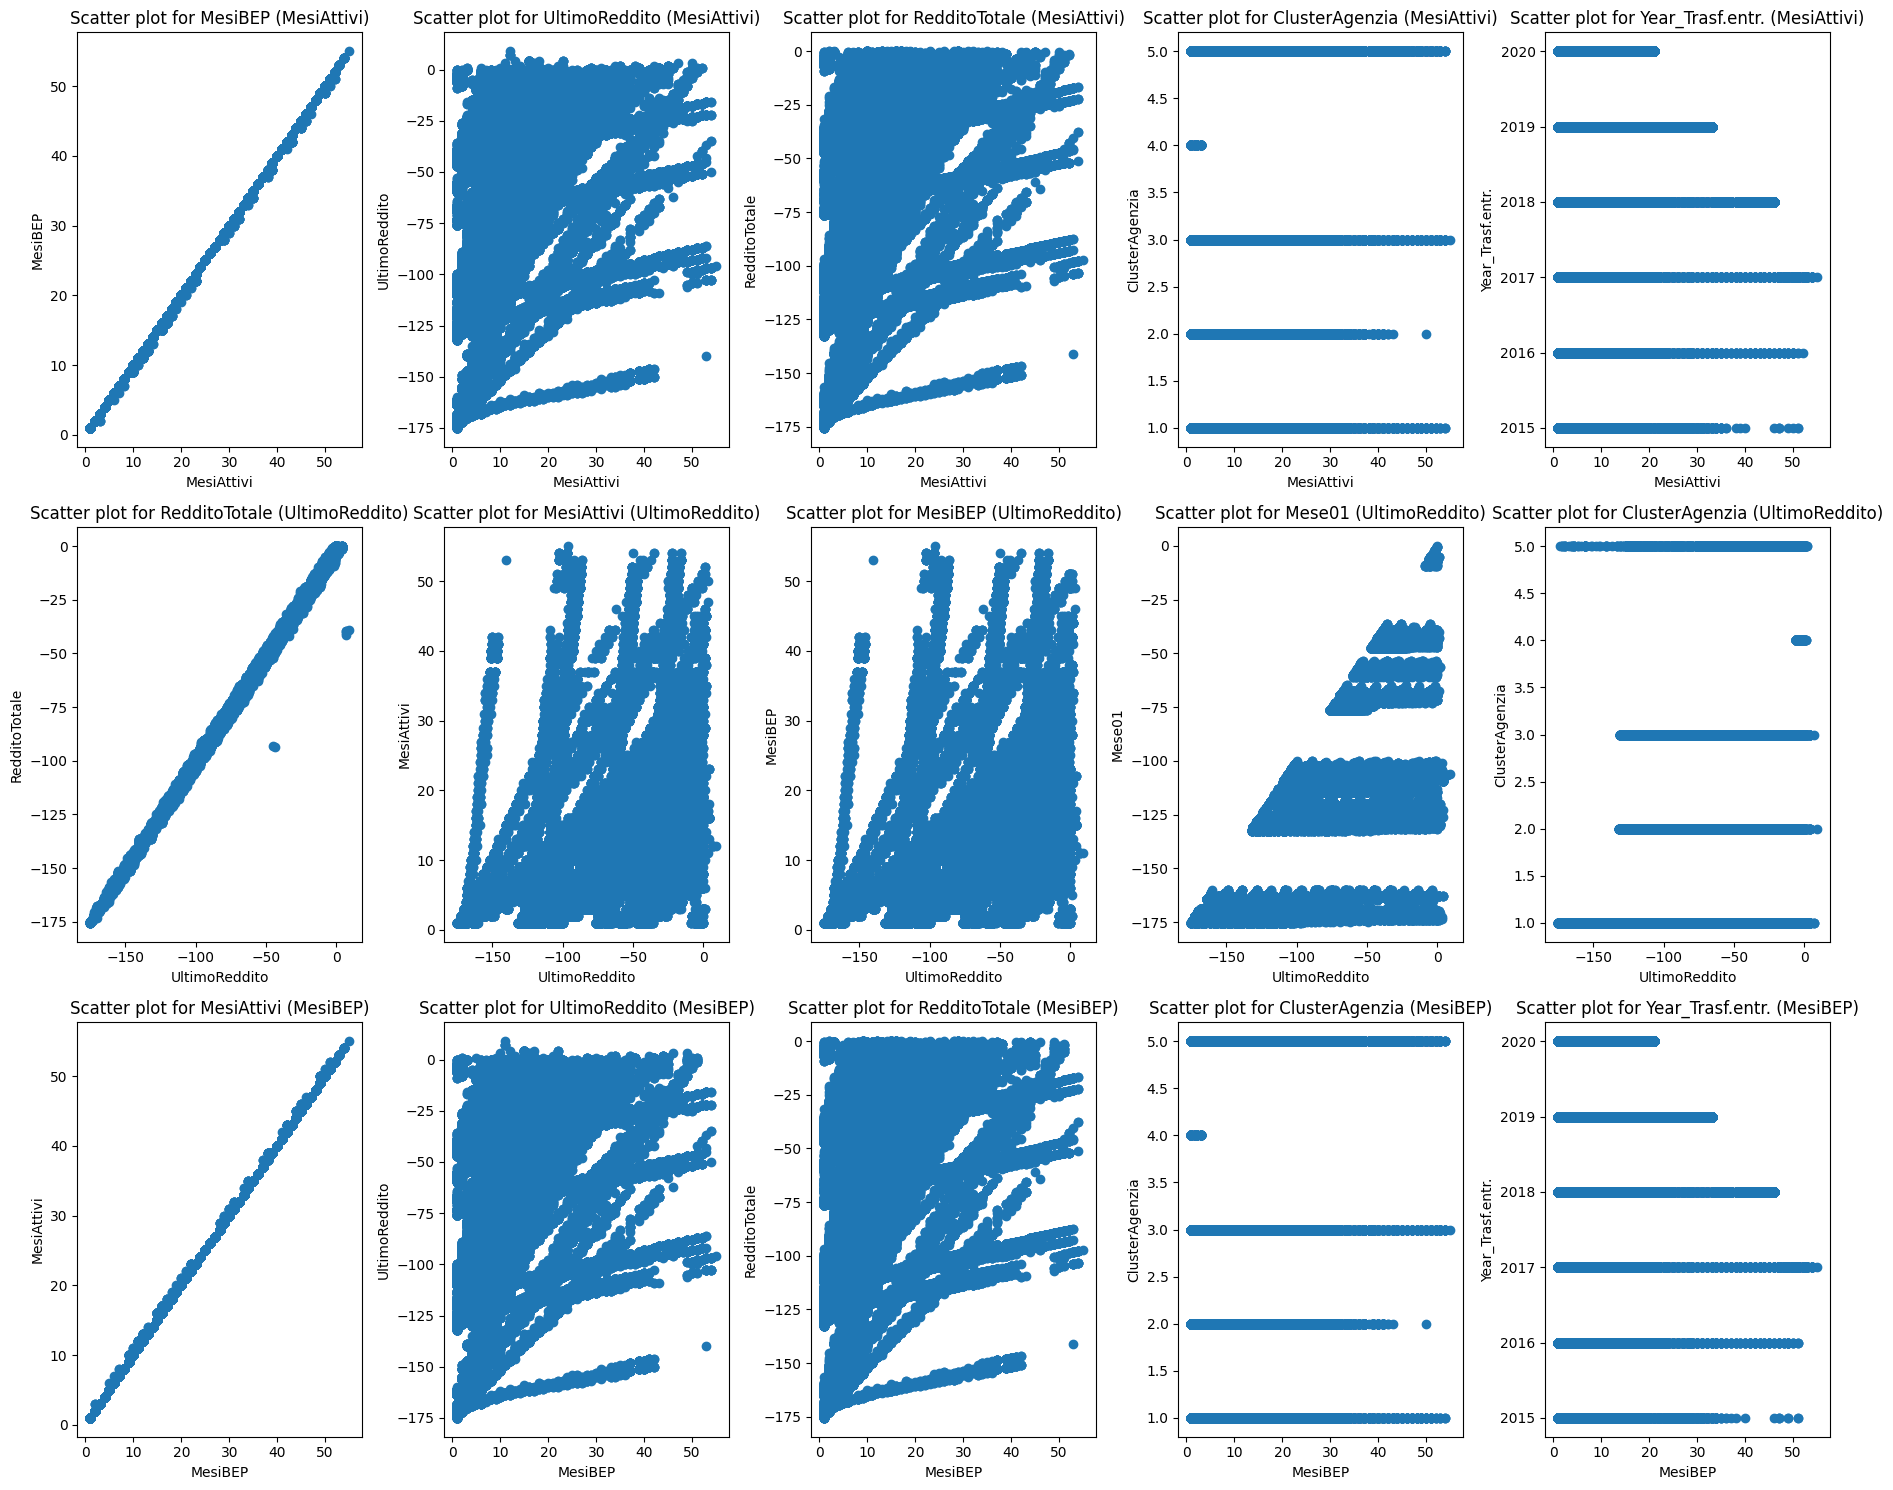

In [19]:
# Calculate the correlation matrix for all columns
correlation_matrix_0 = df_0.corr()

# Create subplots
fig, axs = plt.subplots(len(targets), num_top_features, figsize=(18.5, 5 * len(targets)))

# Iterate through target variables
for i, target_variable in enumerate(targets):
    # Sort features based on their correlation with the current target variable
    sorted_features = correlation_matrix_0[target_variable].abs().sort_values(ascending=False).index
    
    # Select the top features (excluding the target variable itself)
    top_features = sorted_features[1:num_top_features + 1]

    # Iterate through the top features for the current target variable
    for j, feature in enumerate(top_features):
        ax = axs[i, j] if len(targets) > 1 else axs[j]
        ax.scatter(df_0[target_variable], df_0[feature])
        ax.set_xlabel(target_variable)
        ax.set_ylabel(feature)
        ax.set_title(f'Scatter plot for {feature} ({target_variable})')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

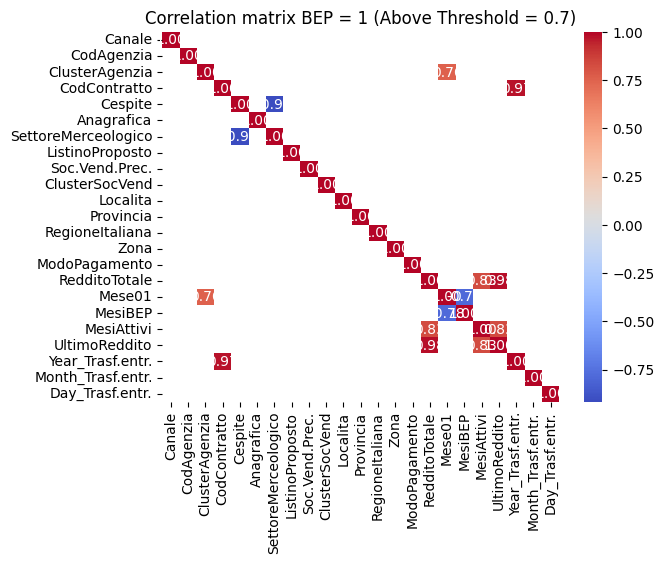

In [20]:
# Set a correlation threshold
threshold = 0.7

# Create a mask to hide the upper triangle of the heatmap (to avoid duplication)
mask = correlation_matrix.abs() < threshold

# Apply the mask to hide values below the threshold
filtered_corr_matrix = correlation_matrix.mask(mask)

# Create a heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation matrix BEP = 1 (Above Threshold = 0.7)')

# Show the plot
plt.show()

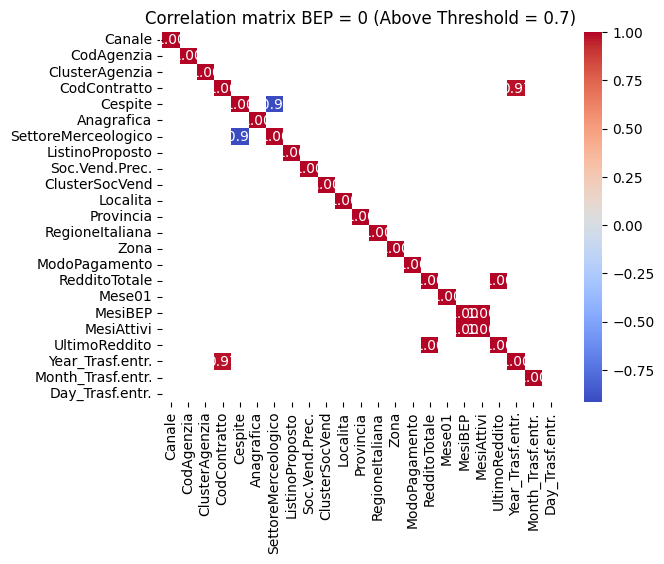

In [21]:
# Set a correlation threshold
threshold = 0.7

# Create a mask to hide the upper triangle of the heatmap (to avoid duplication)
mask = correlation_matrix_0.abs() < threshold

# Apply the mask to hide values below the threshold
filtered_corr_matrix = correlation_matrix_0.mask(mask)

# Create a heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation matrix BEP = 0 (Above Threshold = 0.7)')

# Show the plot
plt.show()

## Machine Learning Part

Unsuitable models were subsequently commented on to improve the performance of others.

According to our assumptions, the evaluations scores and the learning curve, we tried to optimise the hyper-parameters of the ML model that we thought were best for our data.

The GridSearch optimisation method was used, but due to time constraints, an annotated file of the setup process was not completed.

The folder contains the necessary file.

In [22]:
# Import necessary libraries to do ML

from sklearn.model_selection import train_test_split#, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor#, RandomForestRegressor
from sklearn.linear_model import LinearRegression#, Lasso
#from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
#from sklearn.neighbors import KNeighborsRegressor

In [23]:
# Define the models

models = {
    'LinearRegression' : LinearRegression(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
   #'Lasso' :   Lasso(),
   #'DecisionTreeRegressor' : DecisionTreeRegressor(),
   #'RandomForestRegressor': RandomForestRegressor(),
   #'KNeighborsRegressor': KNeighborsRegressor(algorithm='auto')
}

In [24]:
# Define the plot_learning_curve function
def plot_learning_curve(model, X, y, target, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation of training set scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test set scores
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training error')
    plt.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color='blue'
    )

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation error')
    plt.fill_between(
        train_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color='green'
    )

    plt.title(f'Learning Curve for {model_name} - {target}')
    plt.xlabel('Number of training samples')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend(loc='upper right')
    plt.grid()
    plt.tight_layout()

    # Return the metrics for logging
    return train_sizes, train_mean, train_std, test_mean, test_std

In [25]:
# Initialize predictions_dict outside the loop
predictions_dict_1 = {name: [] for name in models}

predictions_dict_0 = {name: [] for name in models}

In [26]:
# Initialize learning_curve_metrics_dict outside the loop
learning_curve_metrics_dict_1 = {name: [] for name in models}

learning_curve_metrics_dict_0 = {name: [] for name in models}

In [27]:
# Create a list to store results
results_1 = []

results_0 = []

In [28]:
# Loop over targets
for target in targets:
    y_1 = df_1[target]
    features_to_exclude = [target]
    X_1 = df_1.drop(features_to_exclude, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Loop over models
    for name, model in models.items():
    
        fit = model.fit(X_train, y_train)

        # Make predictions
        y_pred = fit.predict(X_test)

        # Append predictions for each target and model separately
        predictions_dict_1[name].append((target, y_pred))

        # Evaluate the model
        mae, mse, r2, explained_variance, max_err = (
            mean_absolute_error(y_test,y_pred),
            mean_squared_error(y_test, y_pred),
            r2_score(y_test, y_pred),
            explained_variance_score(y_test, y_pred),
            np.max(np.abs(y_test - y_pred)),
        )
         # Append results to the list
        results_1.append({
            'Model': name,
            'Target': target,
            'MAE' : mae,
            'MSE': mse,
            'R^2': r2,
            'Explained Variance': explained_variance,
            'Max Error': max_err
        })

        # Plot and save the learning curve
        train_sizes, train_mean, train_std, test_mean, test_std = plot_learning_curve(model, X_train, y_train, target, name)
        plt.savefig(f'{name}_{target}_learning_curve_1.png')
        plt.close()

        # Append metrics for each target and model separately
        learning_curve_metrics_dict_1[name].append({
            'Target': target,
            'Train Sizes': train_sizes,
            'Train Mean': train_mean,
            'Train Std': train_std,
            'Test Mean': test_mean,
            'Test Std': test_std
        })

# Convert the learning curve metrics dictionary to a DataFrame
learning_curve_metrics_1_df = pd.DataFrame.from_dict({(i, j): learning_curve_metrics_dict_1[i][j] 
                                                    for i in learning_curve_metrics_dict_1.keys() 
                                                    for j in range(len(learning_curve_metrics_dict_1[i]))}, 
                                                   orient='index')




In [30]:
# Get the current working directory
current_directory = os.getcwd()

# Save the DataFrame to a CSV file
learning_curve_metrics_1_csv = learning_curve_metrics_1_df.to_csv(os.path.join(current_directory, 'learning_curve_metrics_1.csv'))

print(f"learning_curve_metrics_1.CSV file saved in: {current_directory}")


learning_curve_metrics_1.CSV file saved in: c:\Users\IreneDeNevi\OneDrive - ITS Incom\Desktop\PW4\PW4\Analisi Dati e ML


In [31]:
# Convert the results list to a DataFrame
results_1_df = pd.DataFrame(results_1)

# Save the DataFrame to a CSV file
evaluation_scores_1_csv = results_1_df.to_csv(os.path.join(current_directory ,'model_evaluation_results_1.csv'), index=False)

print(f"model_evaluation_results_1.CSV file saved in: {current_directory}")

model_evaluation_results_1.CSV file saved in: c:\Users\IreneDeNevi\OneDrive - ITS Incom\Desktop\PW4\PW4\Analisi Dati e ML


In [32]:
# Loop over targets
for target in targets:
    y_0 = df_0[target]
    features_to_exclude = [target]
    X_0 = df_0.drop(features_to_exclude, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Loop over models
    for name, model in models.items():
    
        fit = model.fit(X_train, y_train)

        # Make predictions
        y_pred = fit.predict(X_test)

        # Append predictions for each target and model separately
        predictions_dict_0[name].append((target, y_pred))

        # Evaluate the model
        mae, mse, r2, explained_variance, max_err = (
            mean_absolute_error(y_test,y_pred),
            mean_squared_error(y_test, y_pred),
            r2_score(y_test, y_pred),
            explained_variance_score(y_test, y_pred),
            np.max(np.abs(y_test - y_pred)),
        )
         # Append results to the list
        results_0.append({
            'Model': name,
            'Target': target,
            'MAE' : mae,
            'MSE': mse,
            'R^2': r2,
            'Explained Variance': explained_variance,
            'Max Error': max_err
        })


        # Plot and save the learning curve
        train_sizes, train_mean, train_std, test_mean, test_std = plot_learning_curve(model, X_train, y_train, target, name)
        plt.savefig(f'{name}_{target}_learning_curve_0.png')
        plt.close()

        # Append metrics for each target and model separately
        learning_curve_metrics_dict_0[name].append({
            'Target': target,
            'Train Sizes': train_sizes,
            'Train Mean': train_mean,
            'Train Std': train_std,
            'Test Mean': test_mean,
            'Test Std': test_std
        })



In [33]:
# Convert the learning curve metrics dictionary to a DataFrame
learning_curve_metrics__0_df = pd.DataFrame.from_dict({(i, j): learning_curve_metrics_dict_0[i][j] 
                                                    for i in learning_curve_metrics_dict_0.keys() 
                                                    for j in range(len(learning_curve_metrics_dict_0[i]))}, 
                                                   orient='index')




In [34]:
# Save the DataFrame to a CSV file
learning_curve_metrics_0_csv = learning_curve_metrics__0_df.to_csv(os.path.join(current_directory, 'learning_curve_metrics_0.csv'))

print(f"learning_curve_metrics_0.CSV file saved in: {current_directory}")

learning_curve_metrics_0.CSV file saved in: c:\Users\IreneDeNevi\OneDrive - ITS Incom\Desktop\PW4\PW4\Analisi Dati e ML


In [35]:
# Convert the results list to a DataFrame
results_0_df = pd.DataFrame(results_0)

# Save the DataFrame to a CSV file
evaluation_scores_0_csv = results_0_df.to_csv(os.path.join(current_directory ,'model_evaluation_results_0.csv'), index=False)

print(f"model_evaluation_results_0.CSV file saved in: {current_directory}")

model_evaluation_results_0.CSV file saved in: c:\Users\IreneDeNevi\OneDrive - ITS Incom\Desktop\PW4\PW4\Analisi Dati e ML


## Saving the results for BI Part


In [36]:
from sqlalchemy import create_engine, inspect
from sqlalchemy.engine import URL

In [37]:
connection_url = URL.create(
    "mssql+pyodbc",
    query={"odbc_connect": connection_string}
)
engine = create_engine(connection_url)

inspector = inspect(engine)


In [40]:
# Transaction handling
try:
    # Loop through models to create separate tables for each
    for model_name, target_pred_list in predictions_dict_1.items():
        if len(target_pred_list) != len(targets):
            raise ValueError(f"Length mismatch for model {model_name}: {len(target_pred_list)} values, {len(targets)} targets")

        table_name = f'{model_name}_predictions_1'
        schema_name = f'pw'

        # Common code for creating and appending DataFrame
        df_model_predictions = pd.DataFrame({f'{target}_{model_name}': [pred[1][i] for pred in target_pred_list] for i, target in enumerate(targets)})

        # Check if the table exists using inspect
        if inspector.has_table(table_name, schema=schema_name):
            df_model_predictions.to_sql(table_name, engine, index=False, if_exists='append', schema=schema_name)
        else:
            df_model_predictions.to_sql(table_name, engine, index=False, if_exists='replace', schema=schema_name)

    # Commit the transaction
    cnxn.commit()

    # Loop through models to create separate tables for each
    for model_name, target_pred_list in predictions_dict_0.items():
        if len(target_pred_list) != len(targets):
            raise ValueError(f"Length mismatch for model {model_name}: {len(target_pred_list)} values, {len(targets)} targets")

        table_name = f'{model_name}_predictions_0'
        schema_name = f'pw'

        # Common code for creating and appending DataFrame
        df_model_predictions = pd.DataFrame({f'{target}_{model_name}': [pred[1][i] for pred in target_pred_list] for i, target in enumerate(targets)})

        # Check if the table exists using inspect
        if inspector.has_table(table_name, schema=schema_name):
            df_model_predictions.to_sql(table_name, engine, index=False, if_exists='append', schema=schema_name)
        else:
            df_model_predictions.to_sql(table_name, engine, index=False, if_exists='replace', schema=schema_name)

    # Commit the transaction
    cnxn.commit()

except Exception as e:
    # Roll back the transaction in case of an error
    cnxn.rollback()
    print(f"Error: {e}")
finally:
    cnxn.close()
